In [1]:
import pandas as pd
import os
import numpy as np
import scipy.stats as stats
from itertools import compress
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

In [ ]:
# Dyskinesia (involuntary, erratic, writhing movements)


In [2]:
direc = "E:\\WS4PD_data"
os.chdir(direc)
save_path = os.path.join(direc, "Figures", "Data_exploration", "GENEActiv_dyskinesia")

In [3]:
# Load score data
score_file_path = os.path.join(direc, 'Feature_extraction','score_by_device.pkl')
df_score = pd.read_pickle(score_file_path)

In [4]:
df_score.head(10)

,subject_id,visit,session,task_code,repetition,tremor_GENEActivHand,tremor_PebbleHand,dyskinesia_GENEActivHand,dyskinesia_PebbleHand,bradykinesia_GENEActivHand,bradykinesia_PebbleHand
0,3_BOS,1,1,stndg,1,0,0,Yes,Yes,NotApplicable,NotApplicable
1,3_BOS,1,1,wlkgs,1,0,0,Yes,Yes,No,No
2,3_BOS,1,1,wlkgc,1,0,0,Yes,Yes,No,No
3,3_BOS,1,1,strsu,1,0,0,Yes,No,No,No
4,3_BOS,1,1,strsd,1,0,0,No,Yes,No,No
5,3_BOS,1,1,wlkgp,1,0,0,Yes,Yes,Yes,No
6,3_BOS,1,1,drawg,1,1,0,No,Yes,No,No
7,3_BOS,1,1,ftnr,1,1,0,No,Yes,No,NotApplicable
8,3_BOS,1,1,ftnl,1,0,1,Yes,No,NotApplicable,No
9,3_BOS,1,1,ftnr,2,0,0,No,Yes,No,NotApplicable


In [5]:
# Try different task categories
# task categories
task_groups = [['stndg', 'sittg', 'wlkgs', 'wlkgc', 'wlkgp', 'strsu', 'strsd', 'ststd',
              'ftnr', 'ftnl', 'ramr', 'raml', 'drawg', 'typng', 'ntblt', 'drnkg', 'orgpa', 'fldng'],
               ['stndg', 'sittg'],['wlkgs', 'wlkgc', 'wlkgp', 'strsu', 'strsd', 'ststd'],
               ['ftnr', 'ftnl', 'ramr', 'raml', 'drawg', 'typng', 'ntblt', 'drnkg', 'orgpa', 'fldng']]
task_group_names = ['all', 'no_voluntary_movement','lowerlimb_movement', 'upperlimb_movement']

In [6]:
is_dyskinesia = df_score['dyskinesia_GENEActivHand'] == 'Yes'
df_score['newDyskinesia_GENEActivHand'] = 0
df_score['newDyskinesia_GENEActivHand'].loc[is_dyskinesia] = 1
score = df_score['newDyskinesia_GENEActivHand'].values

C:\Users\Yiting\Anaconda3\envs\ws4pd\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
score

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

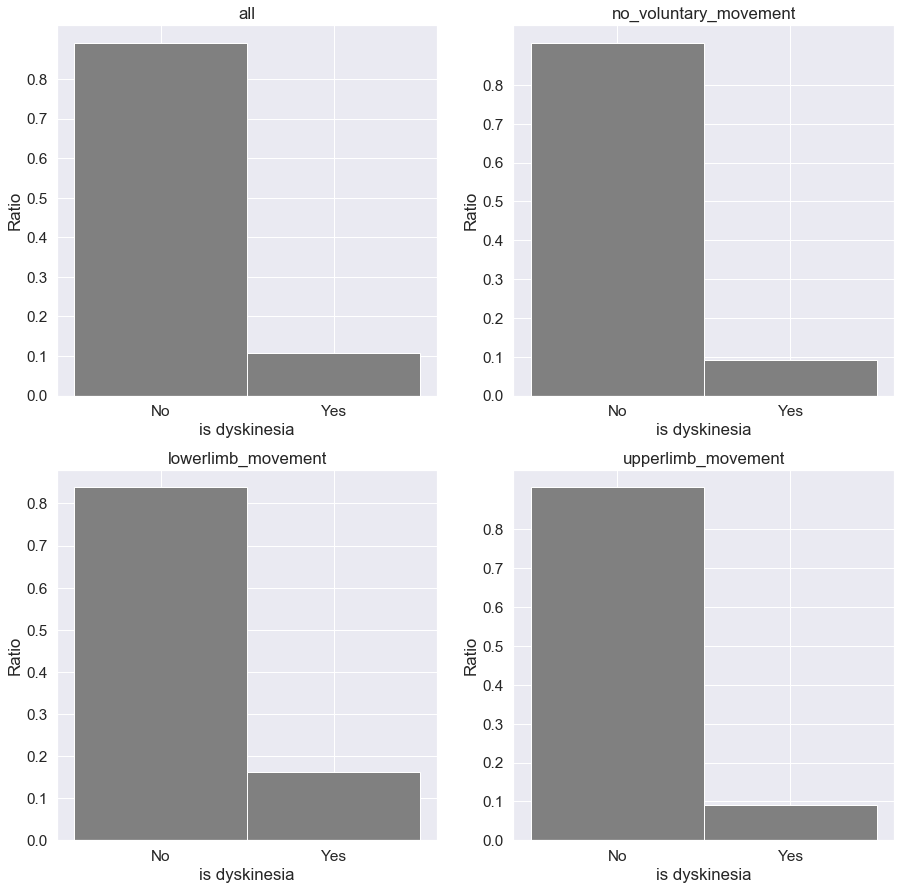

In [8]:
fig, axes = plt.subplots(2,2, figsize=(15,15))
axes = axes.flatten()
for t,task,task_name in zip(range(len(task_groups)),task_groups, task_group_names):
    is_tasks = df_score['task_code'].isin(task).tolist()
    score_task = score[is_tasks]
    
    axes[t].hist(score_task, histtype='bar', color = 'grey', bins = range(3), density = True)
    axes[t].set_xlabel('is dyskinesia')
    axes[t].set_ylabel('Ratio')
    axes[t].set_yticks(np.arange(0,0.9,0.1))
    axes[t].set_xticks([0.5,1.5], labels = ['No', 'Yes'])
    axes[t].set_title(task_name)
    
    # save figure
    # plt.savefig(os.path.join(save_path,"Tremor_score_distribution"))